Imports block

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Loading the dataset from the Seaborn library:

In [2]:
titanic = sns.load_dataset('titanic')

Viewing the first rows of the dataset to confirm that it loaded correctly.

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Checking the column types and identifying which ones need conversion.

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


The `age` column is currently of type `float64`, but if all non-null values are integers, it can be converted to `Int64` to reduce memory usage. Columns of type `object` that contain a limited number of categories (`sex`, `embarked`, `who`, `embark_town`, `alive`) should be converted to the `category` type as well.

Checking the statistics for all columns in the dataset.


In [5]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Assessing the number of duplicates using two methods and then removing them.

In [6]:
original_len = len(titanic)
drop_dup_df = titanic.drop_duplicates()
new_len = len(drop_dup_df)
duplicates_count = original_len - new_len
print('Long method')
print(f'Number of duplicates: {duplicates_count}')
duplicates_count2 = titanic.duplicated().sum()
print('Short method')
print(f'Number of duplicates: {duplicates_count2}')
titanic = titanic.drop_duplicates()

Long method
Number of duplicates: 107
Short method
Number of duplicates: 107


Creating a single column that shows the number of relatives each passenger had on board, instead of the `sibsp`, `parch`, and `alone` columns. Then deleting these three columns because they are no longer needed.

In [7]:
titanic['relatives_count'] = titanic['sibsp'] + titanic['parch']
titanic.drop(['sibsp', 'parch', 'alone'], axis=1, inplace=True)
titanic.head()

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,relatives_count
0,0,3,male,22.0,7.2500,S,Third,man,True,NaN,Southampton,no,1
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,yes,1
2,1,3,female,26.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,0
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,yes,1
4,0,3,male,35.0,8.0500,S,Third,man,True,NaN,Southampton,no,0


Creating a count plot based on the new column to visualize the distribution of the number of relatives on board.

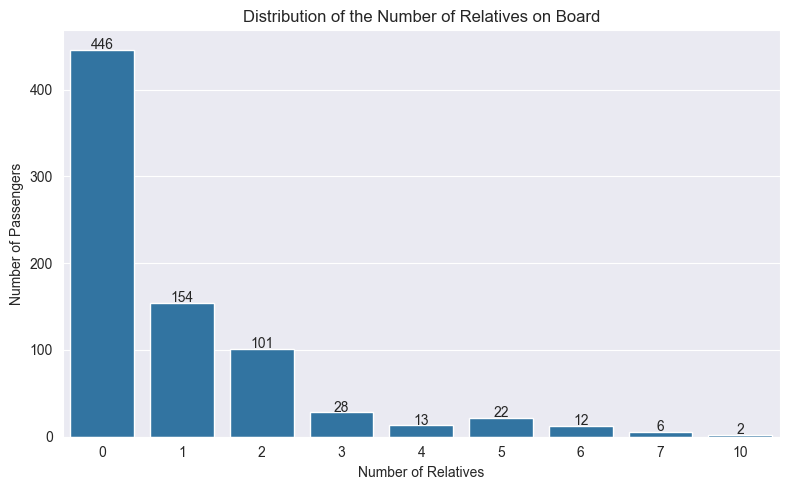

In [8]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=titanic, x='relatives_count')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,
        s=int(height),
        ha='center'
    )
plt.title('Distribution of the Number of Relatives on Board')
plt.xlabel('Number of Relatives')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

Using a lambda function to replace the number of relatives greater than 5 with the value `"above 5"`:

In [9]:
titanic['relatives_count'] = titanic['relatives_count'].apply(
    lambda x: 'above 5' if x > 5 else x)

Displaying the statistics for the modified column, placing the new category at the end (by converting the column to a categorical type):

In [10]:
categories_order = [0, 1, 2, 3, 4, 5, 'above 5']
titanic['relatives_count'] = pd.Categorical(
    titanic['relatives_count'],
    categories=categories_order,
    ordered=True
)
print(titanic['relatives_count'].value_counts().sort_index())

relatives_count
0          446
1          154
2          101
3           28
4           13
5           22
above 5     20
Name: count, dtype: int64


Filling the missing `age` values with the median.

In [11]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

Creating a new column where age is represented as categories instead of numeric values (e.g., under 14, 14–34, 35–59, 60+). Using a def function for this. Passengers with unknown age are labeled accordingly.

In [12]:
def age_group(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 14:
        return '< 14'
    elif age < 35:
        return '14-34'
    elif age < 60:
        return '35-59'
    else:
        return '>= 60'
titanic['age_group'] = titanic['age'].apply(age_group)

Checking which age category had the highest mortality. To do this, converting the `alive` column to a boolean type. Then calculating the total number of passengers and the number of those who did not survive. After that, computing the relative mortality rate for each category.

In [13]:
titanic['alive'] = titanic['alive'].apply(lambda x: 'alive' if x == 'yes' else 'dead')
count_passengers_age = titanic.groupby('age_group').size()
count_dead_passengers_age = titanic[titanic['alive'] == 'dead'].groupby('age_group').size()
rate_for_categories_age = round((count_dead_passengers_age / count_passengers_age) * 100, 2)
max_rate_age = rate_for_categories_age.max()
max_category_age = rate_for_categories_age[rate_for_categories_age == max_rate_age]
print(f'''Relative mortality rate for each category:
{rate_for_categories_age.sort_values()}''')
print(f'''Category with the highest mortality rate:
{max_category_age.index[0]} — {max_category_age.values[0]}''')


Relative mortality rate for each category:
age_group
< 14     41.43
35-59    58.05
14-34    60.87
>= 60    73.08
dtype: float64
Category with the highest mortality rate:
>= 60 — 73.08


Recreating the mortality statistics as a pie chart broken down by age groups. We notice that the percentages differ, and the explanation for this is provided below.

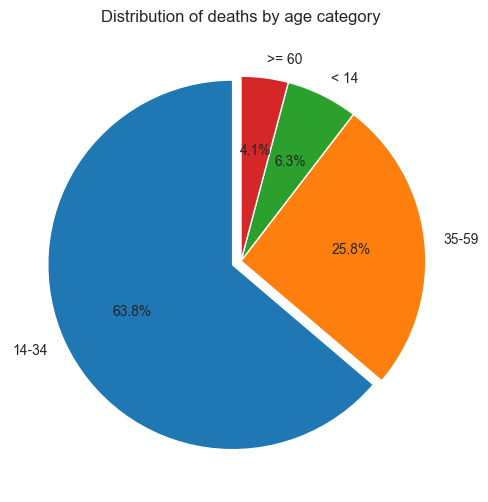

In [14]:
max_group = count_dead_passengers_age.idxmax()
explode = [0.05 if group == max_group else 0 for group in count_dead_passengers_age.index]
plt.figure(figsize=(6,6))
plt.pie(
    x=count_dead_passengers_age.values,
    labels=count_dead_passengers_age.index,
    explode=explode,
    autopct='%.1f%%',
    startangle=90
)
plt.title('Distribution of deaths by age category')
plt.show()


The percentage changed because in the previous task we calculated the *relative mortality rate* — that is, the proportion of deaths within each age group relative to the total number of passengers in that specific group.
Meanwhile, the pie chart shows the *absolute share* of deaths relative to all passengers on the ship, regardless of the size of each age group.

Analyzing the extended mortality statistics by `pclass`, `relatives_count`, and `deck` to identify which factors are most strongly associated with the mortality rate.

Relative and absolute mortality by pclass

Relative mortality rate for each pclass category:
pclass
1    36.92
2    49.09
3    74.32
dtype: float64
Category with the highest mortality rate by pclass:
3 — 74.32
Pie chart of the absolute mortality count by pclass


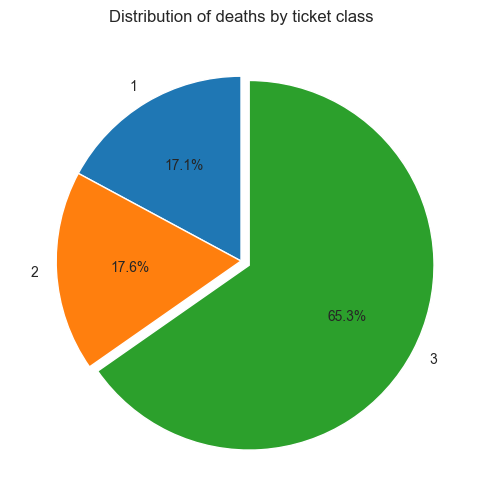

In [15]:
count_passengers_pclass = titanic.groupby('pclass').size()
count_dead_passengers_pclass = titanic[titanic['alive'] == 'dead'].groupby('pclass').size()
rate_for_categories_pclass = round((count_dead_passengers_pclass / count_passengers_pclass) * 100, 2)
max_rate_pclass = rate_for_categories_pclass.max()
max_category_pclass = rate_for_categories_pclass[rate_for_categories_pclass == max_rate_pclass]
print(f'''Relative mortality rate for each pclass category:
{rate_for_categories_pclass.sort_values()}''')
print(f'''Category with the highest mortality rate by pclass:
{max_category_pclass.index[0]} — {max_category_pclass.values[0]}''')
print('Pie chart of the absolute mortality count by pclass')
max_group_pclass = count_dead_passengers_pclass.idxmax()
explode_pclass = [0.05 if group == max_group_pclass else 0 for group in count_dead_passengers_pclass.index]
plt.figure(figsize=(6,6))
plt.pie(
    x=count_dead_passengers_pclass.values,
    labels=count_dead_passengers_pclass.index,
    explode=explode_pclass,
    autopct='%.1f%%',
    startangle=90
)
plt.title('Distribution of deaths by ticket class')
plt.show()


Relative and absolute mortality by relatives_count

Relative mortality rate for each relatives_count category:
relatives_count
3          28.57
2          42.57
1          44.81
0          66.37
4          76.92
above 5    80.00
5          86.36
dtype: float64
Category with the highest mortality rate by relatives_count:
5 — 86.36
Pie chart of the absolute mortality count by relatives_count


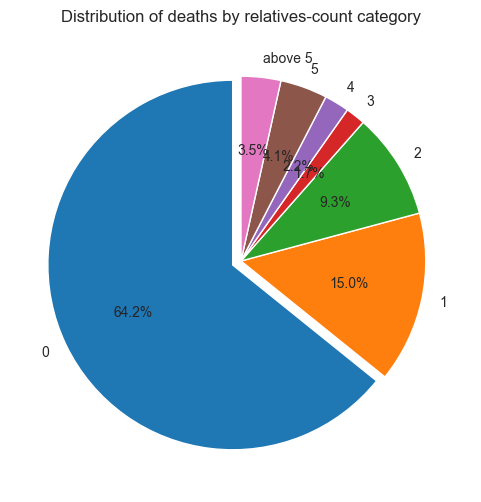

In [16]:
count_passengers_relatives = titanic.groupby('relatives_count',observed = False).size()
count_dead_passengers_relatives = titanic[titanic['alive'] == 'dead'].groupby('relatives_count',observed = False).size()
rate_for_categories_relatives = round((count_dead_passengers_relatives / count_passengers_relatives) * 100, 2)
max_rate_relatives = rate_for_categories_relatives.max()
max_category_relatives = rate_for_categories_relatives[rate_for_categories_relatives == max_rate_relatives]
print(f'''Relative mortality rate for each relatives_count category:
{rate_for_categories_relatives.sort_values()}''')
print(f'''Category with the highest mortality rate by relatives_count:
{max_category_relatives.index[0]} — {max_category_relatives.values[0]}''')
print('Pie chart of the absolute mortality count by relatives_count')
max_group_relatives = count_dead_passengers_relatives.idxmax()
explode_relatives = [0.05 if group == max_group_relatives else 0 for group in count_dead_passengers_relatives.index]
plt.figure(figsize=(6,6))
plt.pie(
    x=count_dead_passengers_relatives.values,
    labels=count_dead_passengers_relatives.index,
    explode=explode_relatives,
    autopct='%.1f%%',
    startangle=90
)
plt.title('Distribution of deaths by relatives-count category')
plt.show()

Relative and absolute mortality by deck

Relative mortality rate for each deck category:
deck
D    24.24
E    25.00
B    26.09
F    38.46
C    40.68
G    50.00
A    53.33
dtype: float64
Category with the highest mortality rate by deck:
A — 53.33
Pie chart of the absolute mortality count by deck


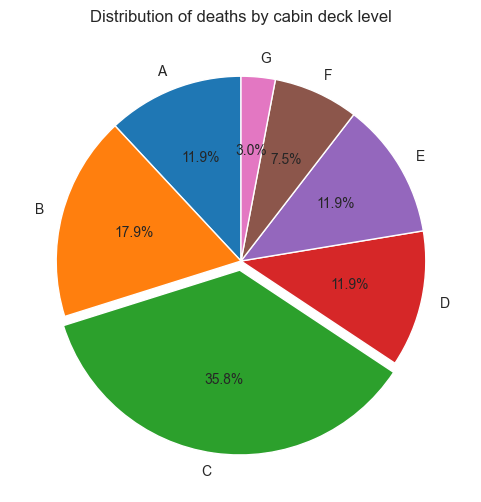

In [17]:
count_passengers_deck = titanic.groupby('deck', observed = False).size()
count_dead_passengers_deck = titanic[titanic['alive'] == 'dead'].groupby('deck', observed = False).size()
rate_for_categories_deck = round((count_dead_passengers_deck / count_passengers_deck) * 100, 2)
max_rate_deck = rate_for_categories_deck.max()
max_category_deck = rate_for_categories_deck[rate_for_categories_deck == max_rate_deck]
print(f'''Relative mortality rate for each deck category:
{rate_for_categories_deck.sort_values()}''')
print(f'''Category with the highest mortality rate by deck:
{max_category_deck.index[0]} — {max_category_deck.values[0]}''')
print('Pie chart of the absolute mortality count by deck')
max_group_deck = count_dead_passengers_deck.idxmax()
explode_deck = [0.05 if group == max_group_deck else 0 for group in count_dead_passengers_deck.index]
plt.figure(figsize=(6,6))
plt.pie(
    x=count_dead_passengers_deck.values,
    labels=count_dead_passengers_deck.index,
    explode=explode_deck,
    autopct='%.1f%%',
    startangle=90
)
plt.title('Distribution of deaths by cabin deck level')
plt.show()

Calculating the difference in mortality rates between the categories of each factor to determine which one has the strongest impact on the likelihood of death.

In [18]:
age_dif = max_rate_age - rate_for_categories_age.min()
pclass_dif = max_rate_pclass - rate_for_categories_pclass.min()
relatives_dif = max_rate_relatives - rate_for_categories_relatives.min()
deck_dif = max_rate_deck - rate_for_categories_deck.min()
total_dif = ['age_dif','pclass_dif','relatives_dif','deck_dif']
print(f'Factor with the highest mortality risk: {max(total_dif)}')


Factor with the highest mortality risk: relatives_dif


The highest mortality rates (in percentage terms) are observed among passengers aged 60+, those traveling in 3rd class, passengers with 5 relatives on board, and those located on deck A.
The factor with the strongest impact on mortality is the number of relatives on board (relatives_count), as it shows the greatest variation in mortality risk between groups.

Sunburst chart showing the distribution of survival outcomes by sex and age group.

In [19]:
add_chart = titanic.groupby(['alive','sex','age_group']).size().reset_index(name='count')
replace_dict = {
    'alive': 'Survived',
    'dead': 'Not Survived',
    '< 14': 'Children',
    '14-34': 'Youth',
    '35-59': 'Middle-aged',
    '>= 60': 'Seniors',
    'male': 'Male',
    'female': 'Female'
}

add_chart = add_chart.replace(replace_dict)

fig = px.sunburst(
    add_chart,
    path=['alive','sex','age_group'],
    values='count',
    title='Passenger Survival Breakdown by Sex and Age Group'
)

fig.update_layout(
    width=1200,
    height=900,
    font=dict(size=16, color='black'),
    title_font_size=22,
    paper_bgcolor='white',
    plot_bgcolor='white',
    title_font_color='black',
    title_x=0.5
)
fig.show()

Heatmap of survival rates by embarkation town and passenger class.

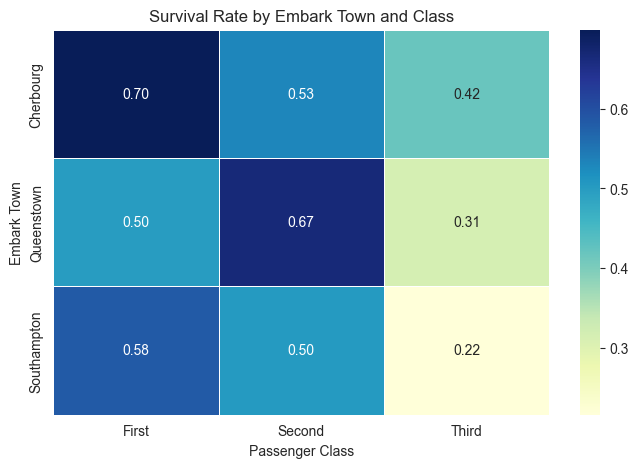

In [20]:
df_clean = titanic.dropna(subset=["embark_town"])

pivot = df_clean.pivot_table(
    values="survived",
    index="embark_town",
    columns="class",
    aggfunc="mean"
).sort_index()

plt.figure(figsize=(8,5))
sns.heatmap(
    pivot,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Survival Rate by Embark Town and Class")
plt.xlabel("Passenger Class")
plt.ylabel("Embark Town")
plt.show()